<div>
    <img src="http://www.ient.rwth-aachen.de/cms/uploads/images/rwth_ient_logo@2x.png" style="float: right;height: 5em;">
</div>

In [1]:
# Copyright 2019 Institut für Nachrichtentechnik, RWTH Aachen University
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import pylab as pl


#iPython Imports
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

#Scikit-Image Imports
from skimage.filters import threshold_otsu
from skimage.morphology import label, square,binary_erosion, binary_dilation
from skimage.measure import regionprops
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

# Labelmatrix
Hier ist ein Beispiel für das resultat eines Labeling dargestellt.  
Die Hintergrundregion(=0) ist grau dargestellt, die zusammenhängenden Vordergrundregionen (=1, 2) schwarz. Die Objektregionen werden in aufsteigender Reihenfolge durchnummeriert.

Anzahl der gefundenen Regionen im Bild:  5


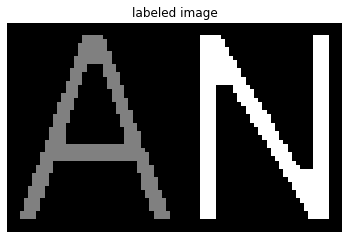

In [5]:
%matplotlib inline
img = imread("../Bilder/Buchstaben.png")

img_gray = rgb2gray(img)
thresh_otsu = threshold_otsu(img_gray)
img_bin = img_gray>thresh_otsu

img_new = ~img_bin
img_new = img_new/255.

kernel1 = square(3)
kernel3 = square(10)
img_erode1 = binary_erosion(img_new,kernel1)
img_dil3 = binary_dilation(img_erode1, kernel3)

img_label = label(img_dil3)

regions = regionprops(img_label)

    ## Filtern der nötigen Parameter zur Speicherung der Bounding-Box-Koordinaten
print("Anzahl der gefundenen Regionen im Bild: ",len(regions))
cols = len(regions)
rows = 4 # Da ein Rechteck 4 Eckpunktkoordinaten besitzt
elemtens = cols*rows
rectArray = np.arange(elemtens).reshape(rows,cols)


    ## Speichere die Koordinaten für jede Region gefunden in regionprops und erhöhe gleichzeitig i
for region, i in zip(regions, range(cols)):
    minr, minc, maxr, maxc = region.bbox # Struktur der jeweiligen Bounding Box [Xmin, Xmax, Ymin, Ymax]
    rectArray[0][i]= minr
    rectArray[1][i]= minc
    rectArray[2][i]= maxr
    rectArray[3][i]= maxc
    
img_cropped = img_dil3[rectArray[0][1]-4:rectArray[2][1]+4, rectArray[1][0]-4:rectArray[3][1]+4]


img_cropped = resize(img_cropped, (50, 80))
img_cropped_label = label(img_cropped)


fig, ax = plt.subplots(1,1)
ax.imshow(img_cropped_label, cmap='gray');
ax.set_axis_off();
ax.set_title('labeled image');

In [ ]:
#from IPython.display import HTML, display
#
#def matrix_to_table(X, header=None):
#    if header is None:
#        header = np.arange(X.shape[1])
#        
#    header_row = '<th></th><th>{}</th>'.format('</th><th>'.join(str(_) for _ in header))
#    
#    display(HTML(
#       '<table><tr>{}</tr><tr>{}</tr></table>'.format(header_row,
#           '</tr><tr>'.join(
#               '<th>{}</th><td>{}</td>'.format(str(i),
#                   '</td><td>'.join(str(_) for _ in row)) for i,row in enumerate(X) 
#            )#join
#        )#format
#    ))
#
#matrix_to_table(img_cropped_label.astype(int))



# Hierher, modifiziert, um 0-Werte grau darzustellen: https://stackoverflow.com/questions/19622407/2d-numpy-array-to-html-table
class PrettyArray(np.ndarray):
    def _repr_html_(self):
        html = [f"<table><tr><th>"]
        rows, columns = self.shape
        html += (f"<th>{j}" for j in range(columns))
        for i in range(rows):
            html.append(f"<tr><th>{i}")
            for j in range(columns):
                val = self[i, j]
                if val == 0:
                    html.append("<td style='color:lightgray;'>")
                else:
                    html.append("<td>")
                html.append((f"{val:.2f}" if self.dtype == float else f"{val}"))
        html.append("</table>")
        return "".join(html)
    
img_cropped_label.astype(int).view(PrettyArray)

PrettyArray([[0, 0, 0, ..., 0, 0, 0],
             [0, 0, 0, ..., 0, 0, 0],
             [0, 0, 0, ..., 0, 0, 0],
             ...,
             [0, 0, 0, ..., 0, 0, 0],
             [0, 0, 0, ..., 0, 0, 0],
             [0, 0, 0, ..., 0, 0, 0]])